# Prep

In [1]:
import requests
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import Finance

from functools import lru_cache

from alpha_vantage.timeseries import TimeSeries

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

# Data

In [3]:
ALPHA_VANTAGE_ACCESS_KEY = context.params['alpha_vantage']['access_key']

In [4]:
ts = TimeSeries(ALPHA_VANTAGE_ACCESS_KEY)

raw_isf, _ = ts.get_daily_adjusted('ISF.LON', outputsize='full')
isf = pd.DataFrame.from_dict(raw_isf, orient='index', dtype='float')

In [5]:
isf.sort_index(inplace=True)

<AxesSubplot:ylabel='Density'>

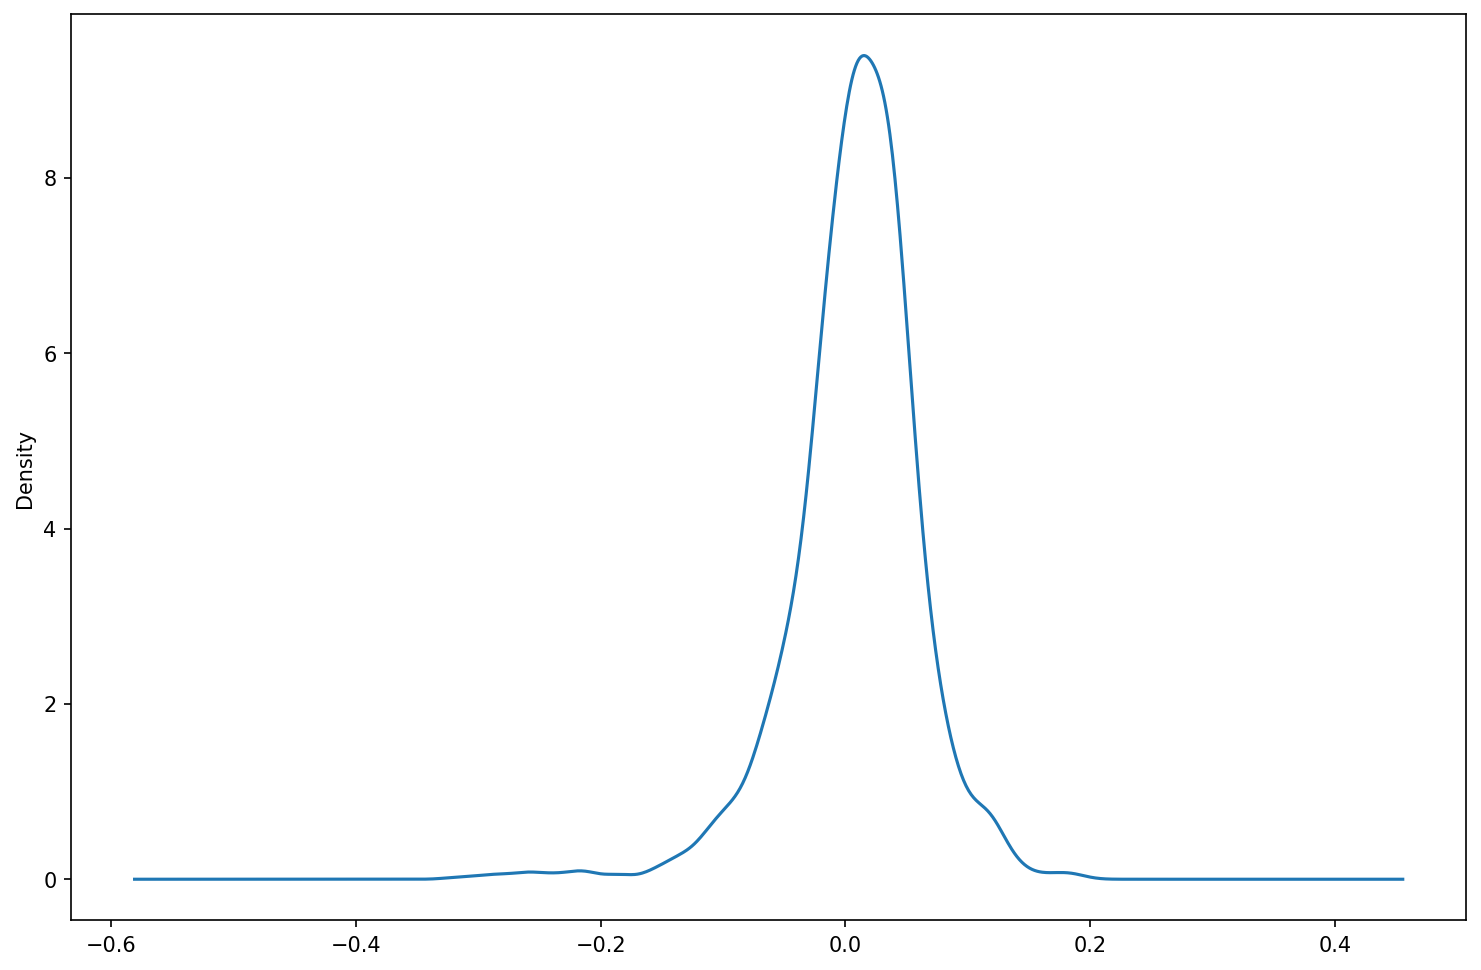

In [6]:
isf['daily'] = isf['5. adjusted close'] / isf['5. adjusted close'].shift(1) - 1
isf['weekly'] = isf['5. adjusted close'] / isf['5. adjusted close'].shift(7) - 1
isf['monthly'] = isf['5. adjusted close'] / isf['5. adjusted close'].shift(30) - 1
isf['annual'] = isf['5. adjusted close'] / isf['5. adjusted close'].shift(365) - 1
isf.monthly.plot.kde()

In [7]:
# prepare samples for statistical analysis
isf_daily = isf['daily'].dropna().sort_values()
isf_weekly = isf['weekly'].dropna().sort_values()
isf_trueweekly = isf['weekly'].dropna()[1::5].sort_values()
isf_monthly = isf['monthly'].dropna().sort_values()
isf_annual = isf['annual'].dropna().sort_values()

# Stats

In [8]:
# Test whether a dataset has normal kurtosis (low p-value indicates not)
stats.kurtosistest(isf_daily)

KurtosistestResult(statistic=26.54547889968113, pvalue=2.8961998712912237e-155)

In [9]:
# Test whether the skew is different from the normal distribution
stats.skewtest(isf_daily)

SkewtestResult(statistic=-4.081950372789015, pvalue=4.465933443663396e-05)

In [10]:
# attempt to fit to normal distribution
dist = getattr(stats, 'norm')
parameters = dist.fit(isf_daily.dropna())
print(parameters)

(0.0002929079214966492, 0.011670120588716104)


In [11]:
# Kolmogorov-Smirnov test for goodness of fit for normal distribution
stats.kstest(isf_daily, "norm", parameters)

KstestResult(statistic=0.08340802345595116, pvalue=2.26874380066592e-25)

In [408]:
%%capture --no-stdout

# 99 continuous distributions available in scipy
list_of_dists = [
    'alpha',
    'anglit',
    'arcsine',
    'argus',
    'beta',
    'betaprime',
    'bradford',
    'burr',
    'burr12',
    'cauchy',
    'chi',
    'chi2',
    'cosine',
    'crystalball',
    'dgamma',
    'dweibull',
    'erlang',
    'expon',
    'exponnorm',
    'exponweib',
    'exponpow',
    'f',
    'fatiguelife',
    'fisk',
    'foldcauchy',
    'foldnorm',
    'genlogistic',
    'gennorm',
    'genpareto',
    'genexpon',
    'genextreme',
    'gausshyper',
    'gamma',
    'gengamma',
    'genhalflogistic',
    'geninvgauss',
    'gilbrat',
    'gompertz',
    'gumbel_r',
    'gumbel_l',
    'halfcauchy',
    'halflogistic',
    'halfnorm',
    'halfgennorm',
    'hypsecant',
    'invgamma',
    'invgauss',
    'invweibull',
    'johnsonsb',
    'johnsonsu',
    'kappa4',
    'kappa3',
    'ksone',
    #'kstwo',
    'kstwobign',
    'laplace',
    'laplace_asymmetric',
    'levy',
    'levy_l',
    #'levy_stable',
    'logistic',
    'loggamma',
    'loglaplace',
    'lognorm',
    'loguniform',
    'lomax',
    'maxwell',
    'mielke',
    'moyal',
    'nakagami',
    'ncx2',
    'ncf',
    'nct',
    'norm',
    'norminvgauss',
    'pareto',
    'pearson3',
    'powerlaw',
    'powerlognorm',
    'powernorm',
    'rdist',
    'rayleigh',
    'rice',
    'recipinvgauss',
    'semicircular',
    'skewnorm',
    't',
    'trapezoid',
    'triang',
    'truncexpon',
    'truncnorm',
    'tukeylambda',
    'uniform',
    'vonmises',
    'vonmises_line',
    'wald',
    'weibull_min',
    'weibull_max',
    'wrapcauchy',
]

def multiple_dist_goodness_of_fit(data):
    # loop through each distribution
    results = []
    for i in list_of_dists:
        dist = getattr(stats, i)
        param = dist.fit(data)
        a = stats.kstest(data, i, args=param)
        results.append((i,*a))

    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results:
        print("{}: statistic={}, pvalue={}".format(*j))
        
multiple_dist_goodness_of_fit(isf_daily)

alpha
anglit
arcsine
argus
beta
betaprime
bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang
expon
exponnorm
exponweib
exponpow
f
fatiguelife
fisk
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper
gamma
gengamma
genhalflogistic
geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
kappa4
kappa3
ksone
kstwobign
laplace
laplace_asymmetric
levy
levy_l
logistic
loggamma
loglaplace
lognorm
loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2
ncf
nct
norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm
powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda
uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy
norminvgauss: statistic=0.009424897583545422, pvalue=0.8543580477890357
johnsonsu: statistic=0.009844031447324653, pvalue=0.8159081400340995
nct: stati

In [415]:
# review the "best" distribution
dist = getattr(stats, 'johnsonsu')
param = dist.fit(isf_daily)

In [416]:
# calculate mean of distribution (population)
dist.stats(*param, moments='m')

array(0.00028188)

In [417]:
# calculate mean of sample data
np.mean(isf_daily)

0.0002929079214966492

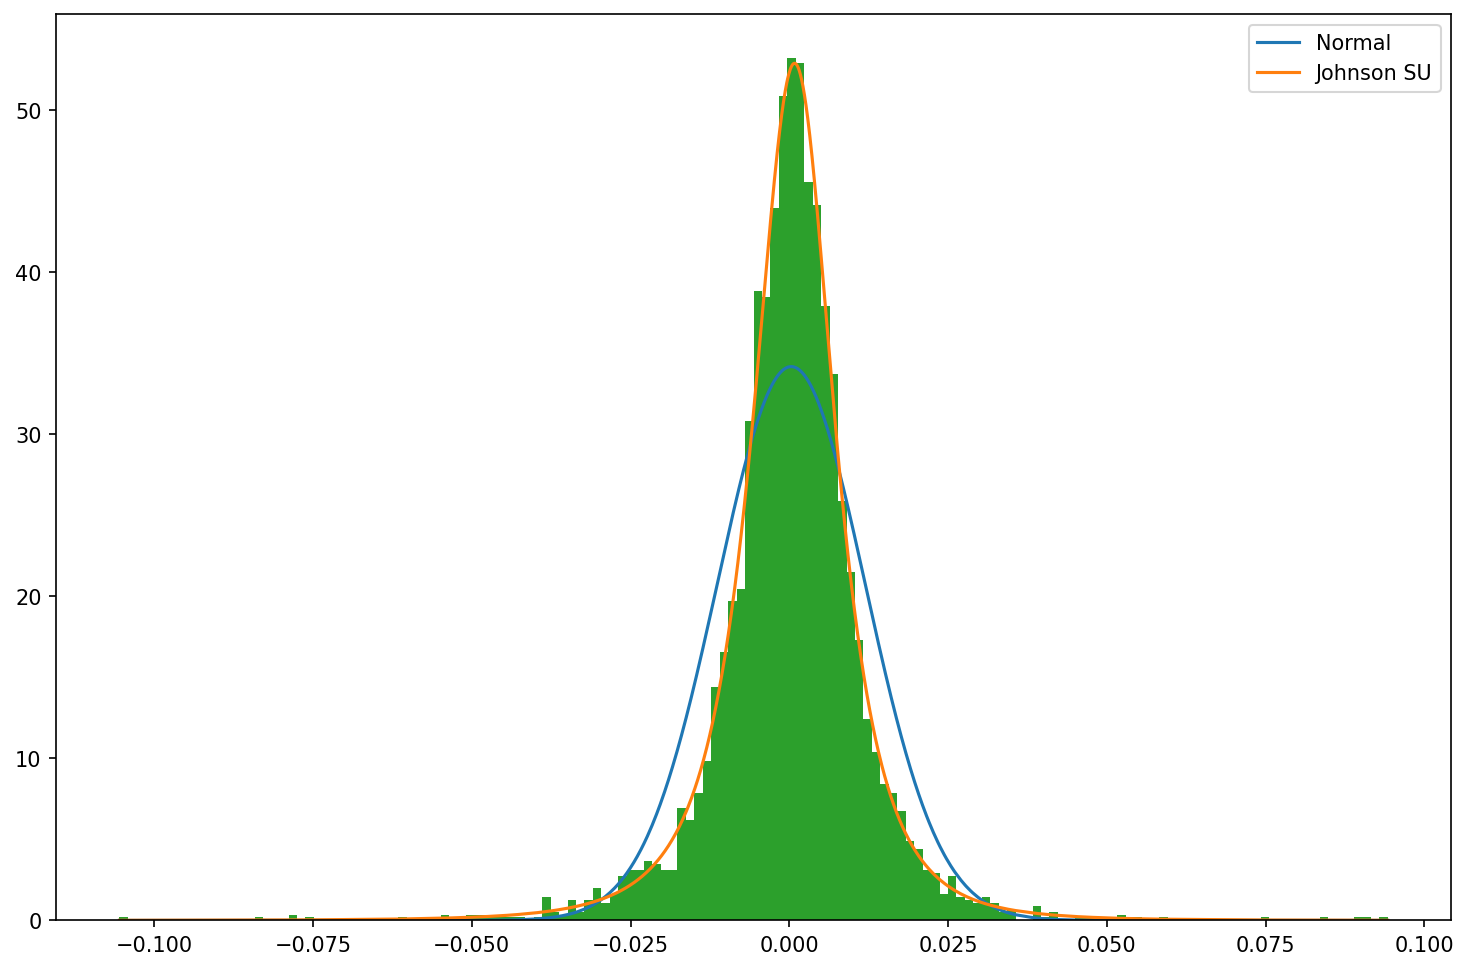

In [418]:
# plot sample, best distribution and normal distribution for comparison

# normal
norm_param = stats.norm.fit(isf_daily)
norm_pdf = stats.norm.pdf(isf_daily, *norm_param)
plt.plot(isf_daily, norm_pdf, label='Normal')

# Johnson SU
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label='Johnson SU')

# Sample histogram
plt.hist(isf_daily, bins=150, density=True)

plt.legend();

In [419]:
print(f"Probability less than -11% change: {100*dist.cdf(-0.11, *param):.2f}%")
print(f"Probability more than -5% change: {100-100*dist.cdf(-0.05, *param):.2f}%")
print(f"Probability less than -1% change: {100*dist.cdf(-0.01, *param):.2f}%")
print(f"Probability more than +1% change: {100-100*dist.cdf(0.01, *param):.2f}%")
print(f"Probability less than +10% change: {100*dist.cdf(0.10, *param):.2f}%")

Probability less than -11% change: 0.01%
Probability more than -5% change: 99.70%
Probability less than -1% change: 12.52%
Probability more than +1% change: 13.41%
Probability less than +10% change: 99.99%


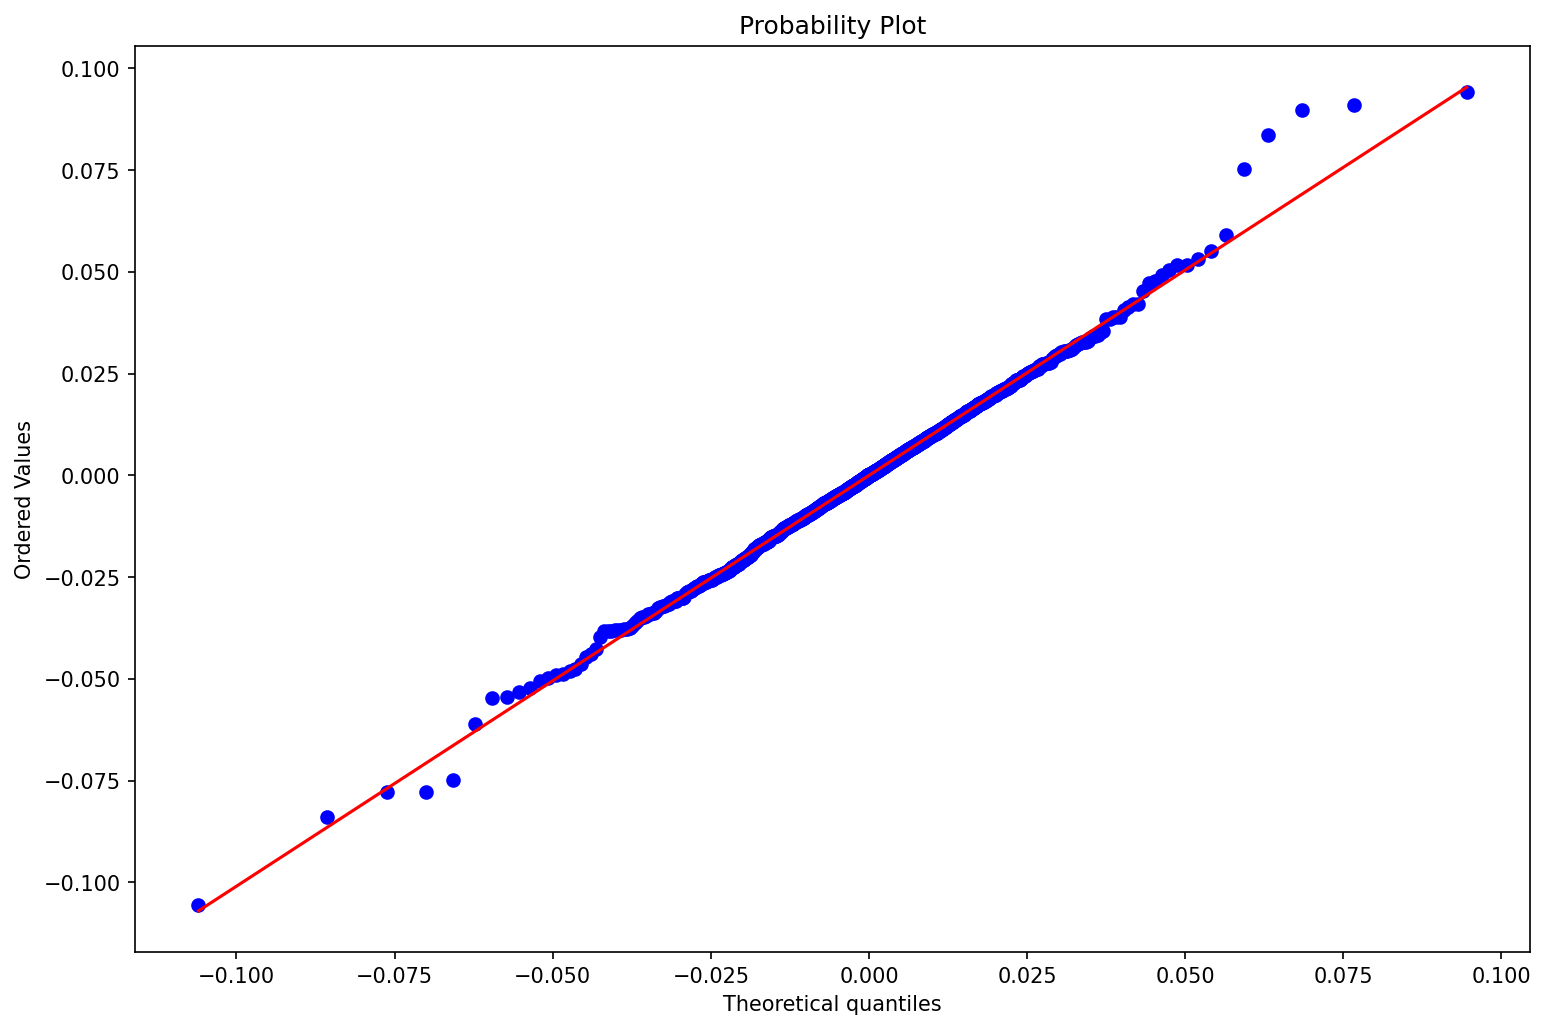

In [420]:
# probability plot against Johnson SU distribution
stats.probplot(isf_daily, plot=plt, dist=dist(*param));

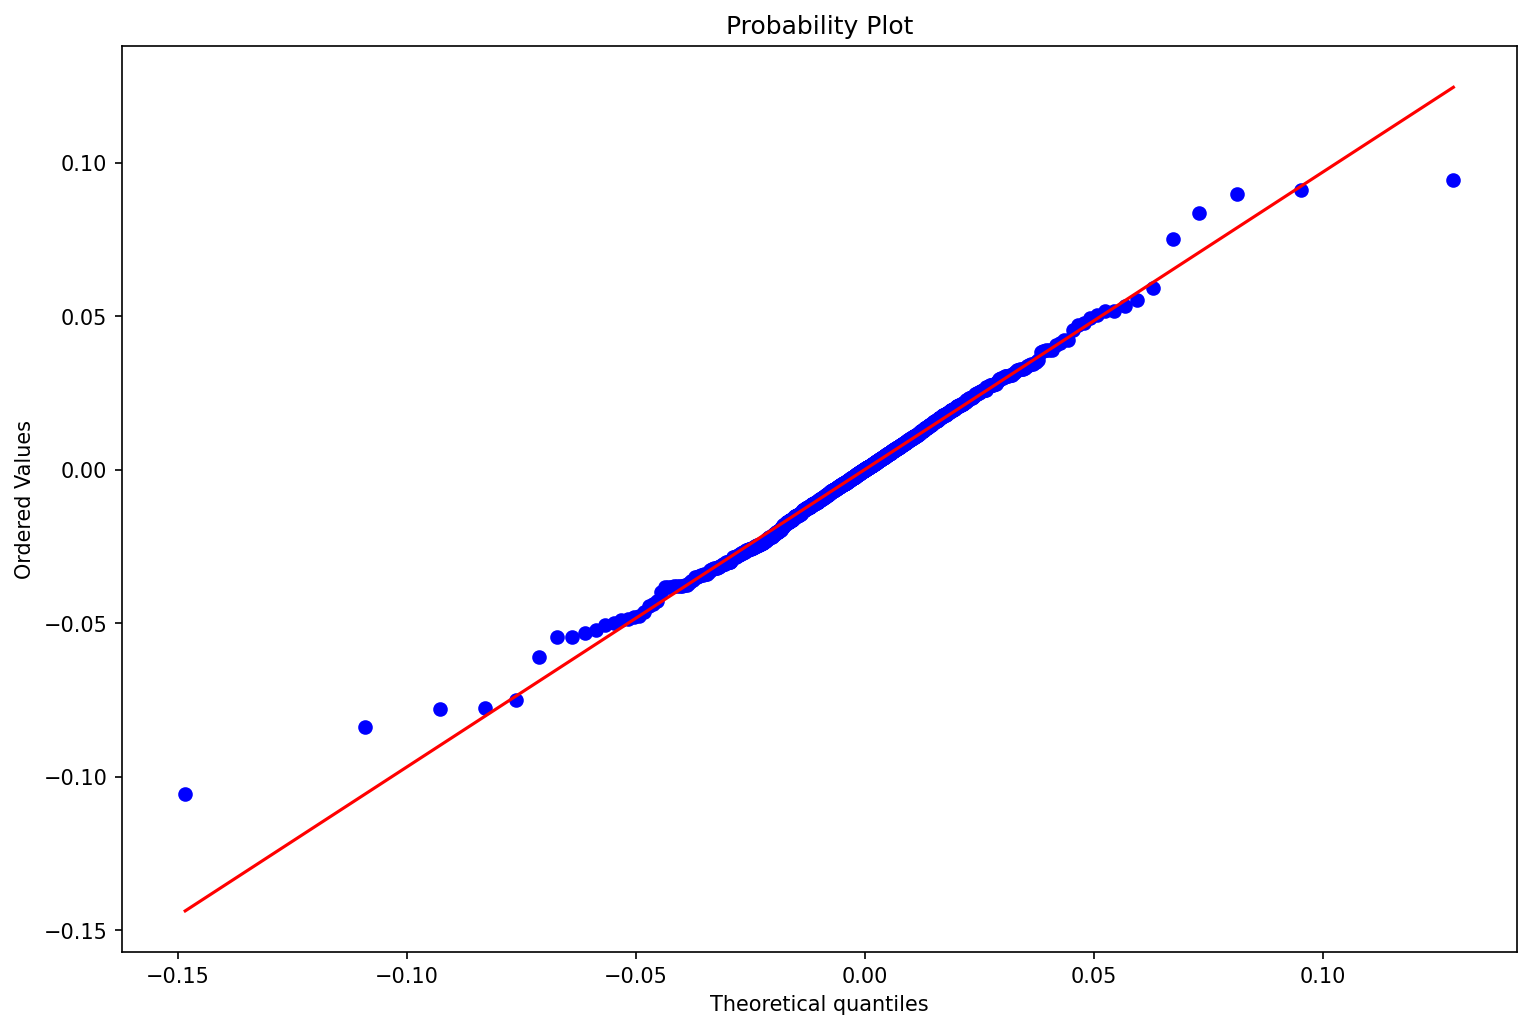

In [421]:
# probability plot against nct (non-central student t), as a comparison
dist_nct = getattr(stats, 'nct')
param_nct = dist_nct.fit(isf_daily)
stats.probplot(isf_daily, plot=plt, dist=dist_nct(*param_nct));

## Weekly

In [21]:
%%capture --no-stdout
multiple_dist_goodness_of_fit(isf_weekly)

johnsonsu: statistic=0.006479850577175372, pvalue=0.9948416516346811
nct: statistic=0.006926044299759959, pvalue=0.9884148182563883
recipinvgauss: statistic=nan, pvalue=nan
t: statistic=0.015345174404459164, pvalue=0.2846399427252071
tukeylambda: statistic=0.016101446886578774, pvalue=0.23425726090912247
hypsecant: statistic=0.019861362231929358, pvalue=0.07696437030415593
genlogistic: statistic=0.023124321455127078, pvalue=0.024228822143594342
gennorm: statistic=0.02491023169029405, pvalue=0.01194976061208642
laplace: statistic=0.025090462844880146, pvalue=0.011094642704161602
logistic: statistic=0.02785914716189236, pvalue=0.003315668116188294
fisk: statistic=0.027863434939035703, pvalue=0.003309148106146534
burr12: statistic=0.02802822078875039, pvalue=0.003067351031649529
dgamma: statistic=0.03523908459431979, pvalue=7.154898111972428e-05
dweibull: statistic=0.037376528417076726, pvalue=1.9921778312977074e-05
cauchy: statistic=0.058084548105375666, pvalue=1.6817158737331425e-12
exp

In [22]:
# review the "best" distribution
dist = getattr(stats, 'johnsonsu')
param = dist.fit(isf_weekly)

In [23]:
# calculate mean of distribution (population)
dist.stats(*param, moments='m')

array(0.00203042)

In [24]:
# calculate mean of sample data
np.mean(isf_weekly)

0.0019894053375935335

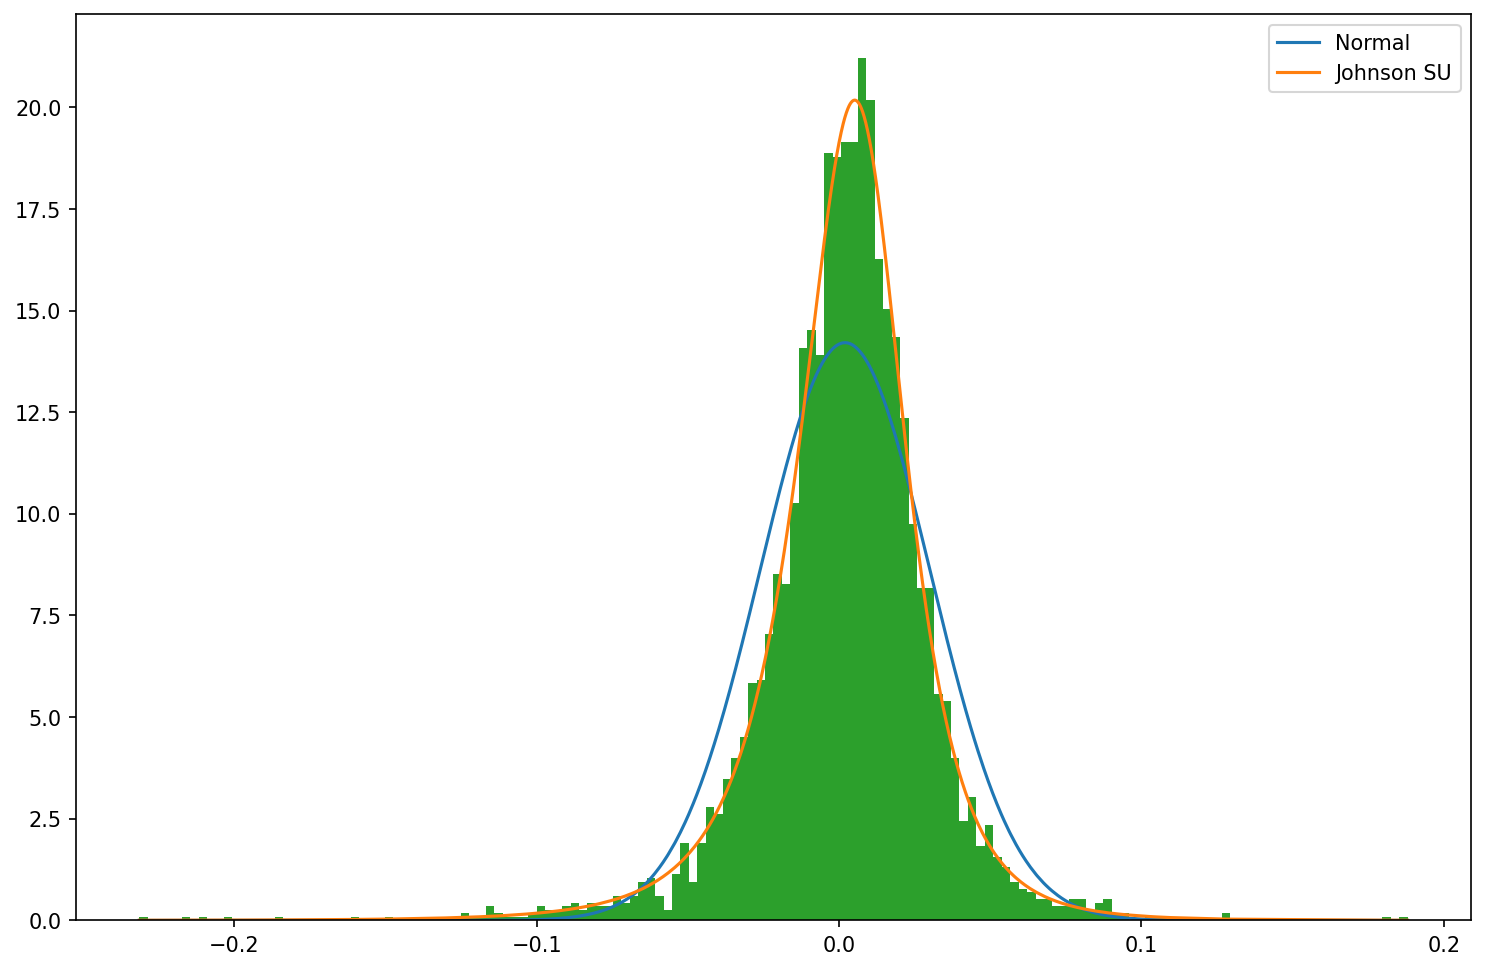

In [25]:
# plot sample, best distribution and normal distribution for comparison

# normal
norm_param = stats.norm.fit(isf_weekly)
norm_pdf = stats.norm.pdf(isf_weekly, *norm_param)
plt.plot(isf_weekly, norm_pdf, label='Normal')

# Johnson SU
pdf = dist.pdf(isf_weekly, *param)
plt.plot(isf_weekly, pdf, label='Johnson SU')

# Sample histogram
plt.hist(isf_weekly, bins=150, density=True)

plt.legend();

## True weekly
Weekly values are truly independent, with downside of less data

In [26]:
%%capture --no-stdout
multiple_dist_goodness_of_fit(isf_trueweekly)

nct: statistic=0.013523212867477041, pvalue=0.9977876210346532
johnsonsu: statistic=0.015475805958608091, pvalue=0.987535316048999
loglaplace: statistic=0.030877759288506057, pvalue=0.4044637192645889
recipinvgauss: statistic=nan, pvalue=nan
t: statistic=0.020091894179639302, pvalue=0.8870931409541584
genlogistic: statistic=0.021876470889478306, pvalue=0.8173932580259295
hypsecant: statistic=0.02620250493094245, pvalue=0.6146905299576704
gennorm: statistic=0.028027269066183136, pvalue=0.528312491108113
laplace: statistic=0.03078511467186673, pvalue=0.40821036555939194
logistic: statistic=0.032038920704628215, pvalue=0.359283110567475
fisk: statistic=0.032337476672559595, pvalue=0.3482109304983073
burr12: statistic=0.032421804699345524, pvalue=0.34512458865276585
dgamma: statistic=0.03840904048845628, pvalue=0.17178597001129048
dweibull: statistic=0.04638465638624778, pvalue=0.056135851951503724
powernorm: statistic=0.05494829750112462, pvalue=0.013362489864319824
exponweib: statistic=0

In [27]:
# review the "best" distribution
dist = getattr(stats, 'nct')
param = dist.fit(isf_trueweekly)

In [28]:
# calculate mean of distribution (population)
dist.stats(*param, moments='m')

array(0.00161639)

In [29]:
# calculate mean of sample data
np.mean(isf_trueweekly)

0.0014761833634943087

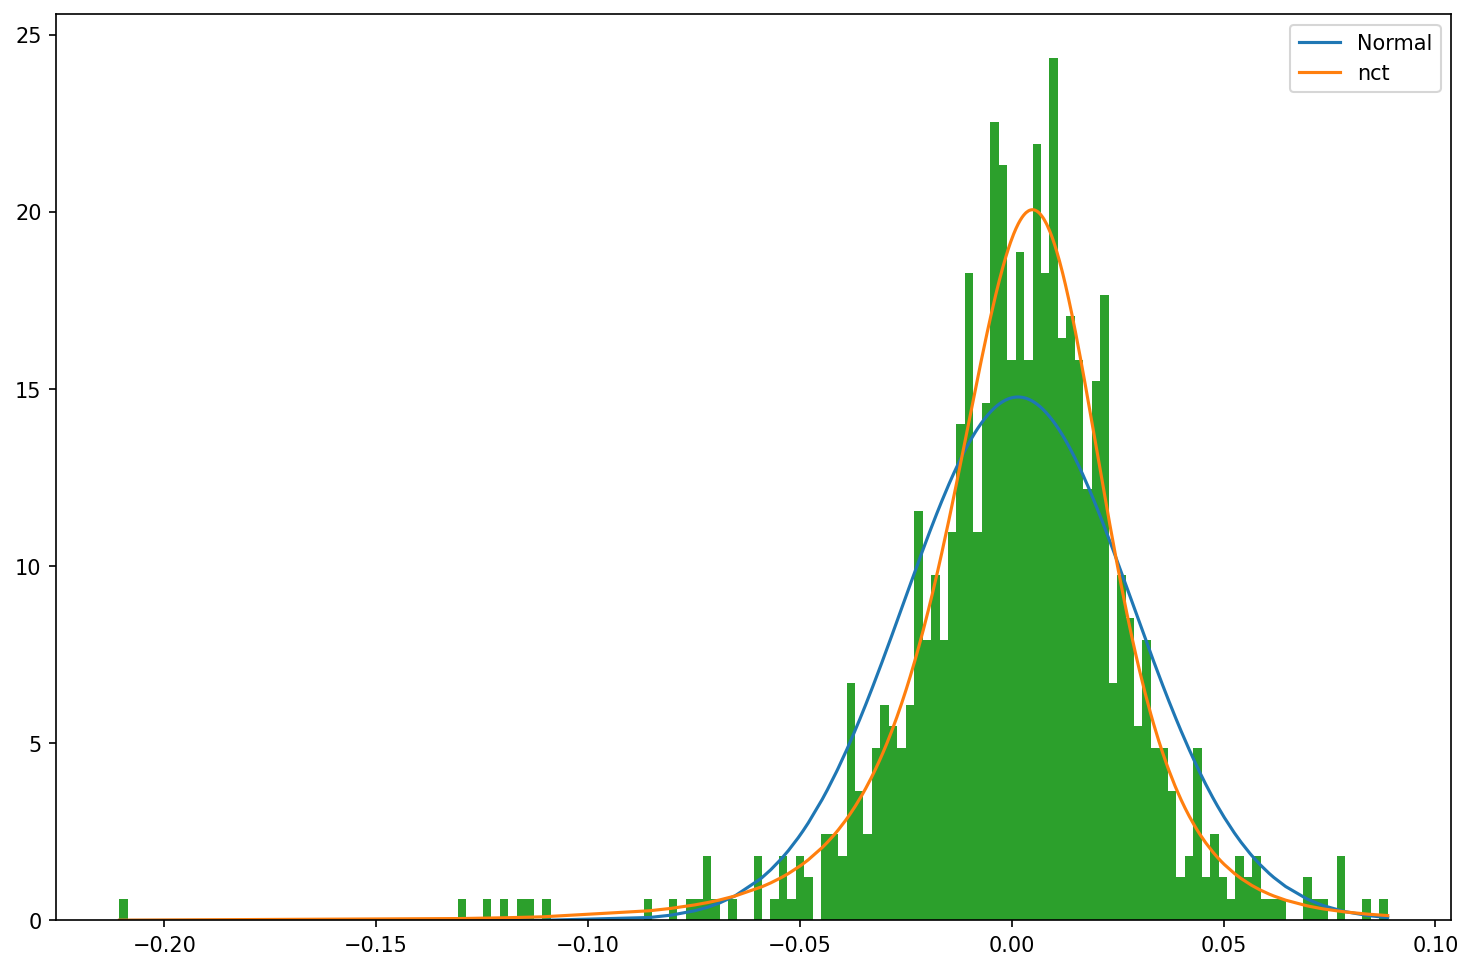

In [30]:
# plot sample, best distribution and normal distribution for comparison

# normal
norm_param = stats.norm.fit(isf_trueweekly)
norm_pdf = stats.norm.pdf(isf_trueweekly, *norm_param)
plt.plot(isf_trueweekly, norm_pdf, label='Normal')

# Johnson SU
pdf = dist.pdf(isf_trueweekly, *param)
plt.plot(isf_trueweekly, pdf, label='nct')

# Sample histogram
plt.hist(isf_trueweekly, bins=150, density=True)

plt.legend();

In [31]:
print(f"Probability less than -20% change: {100*dist.cdf(-0.20, *param):.2f}%")
print(f"Probability more than 10% change: {100-100*dist.cdf(0.10, *param):.2f}%")

Probability less than -20% change: 0.05%
Probability more than 10% change: 0.20%


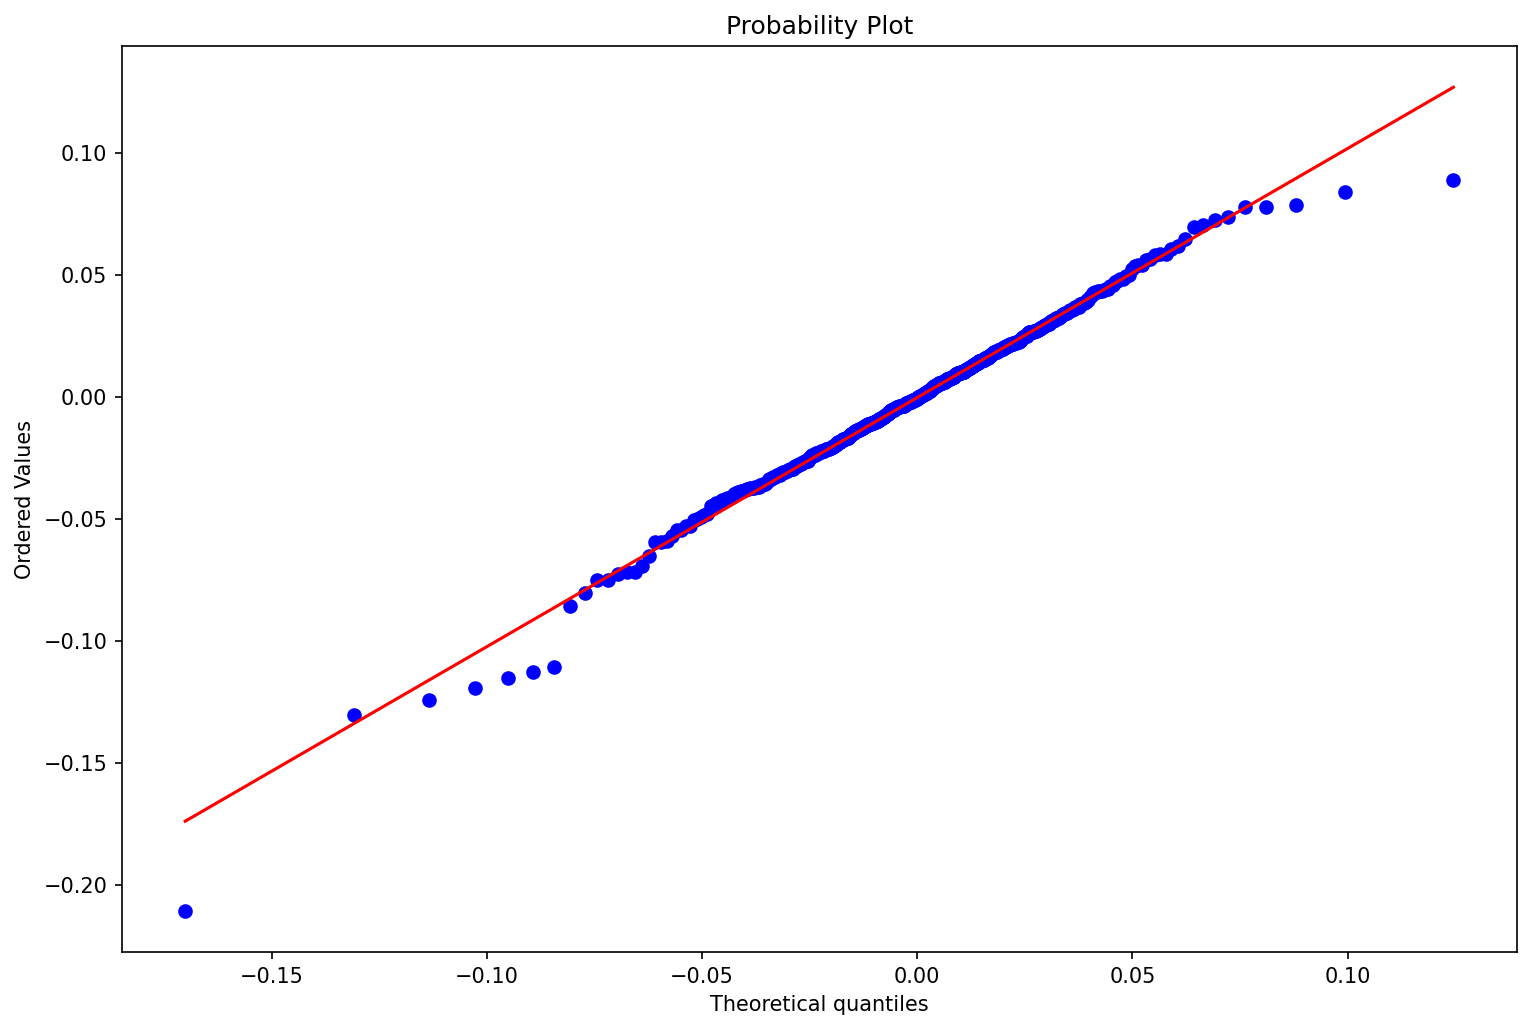

In [32]:
# probability plot against nct (non-central student t)
stats.probplot(isf_trueweekly, plot=plt, dist=dist(*param));

## Tweak Parameters

### Parameter a

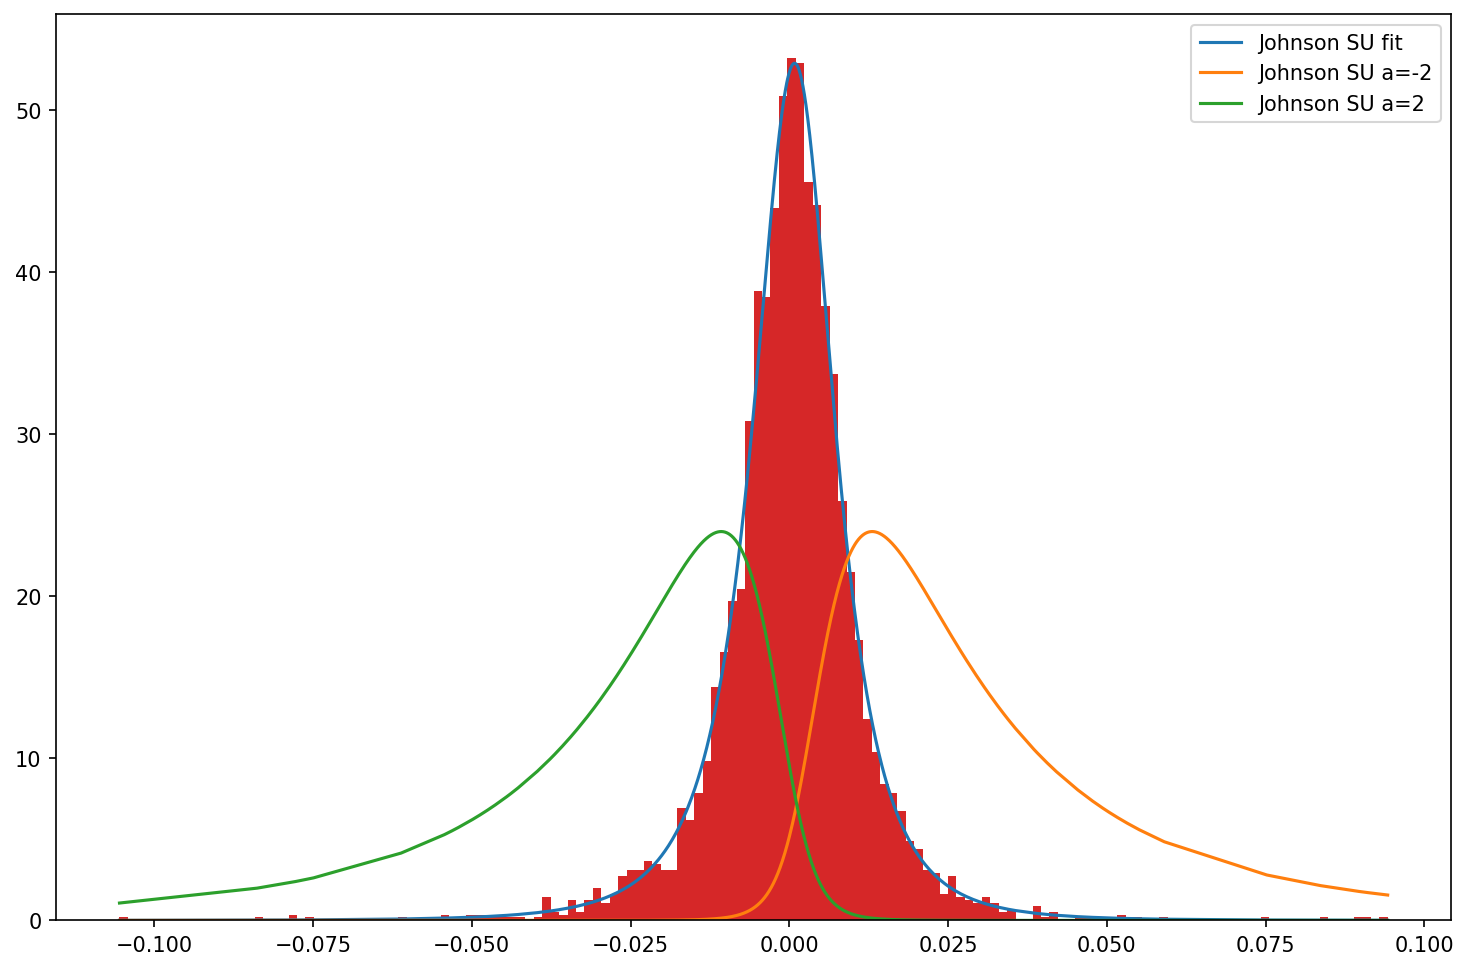

In [33]:
# reset parameters
dist = getattr(stats, 'johnsonsu')
param = list(dist.fit(isf_daily))

# Tweak parameter a

# Johnson SU
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label='Johnson SU fit')

# parameter a lower
param[0] = -2
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU a={param[0]}')

# parameter a higher
param[0] = 2
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU a={param[0]}')


# Sample histogram
plt.hist(isf_daily, bins=150, density=True)

plt.legend();

### Parameter b

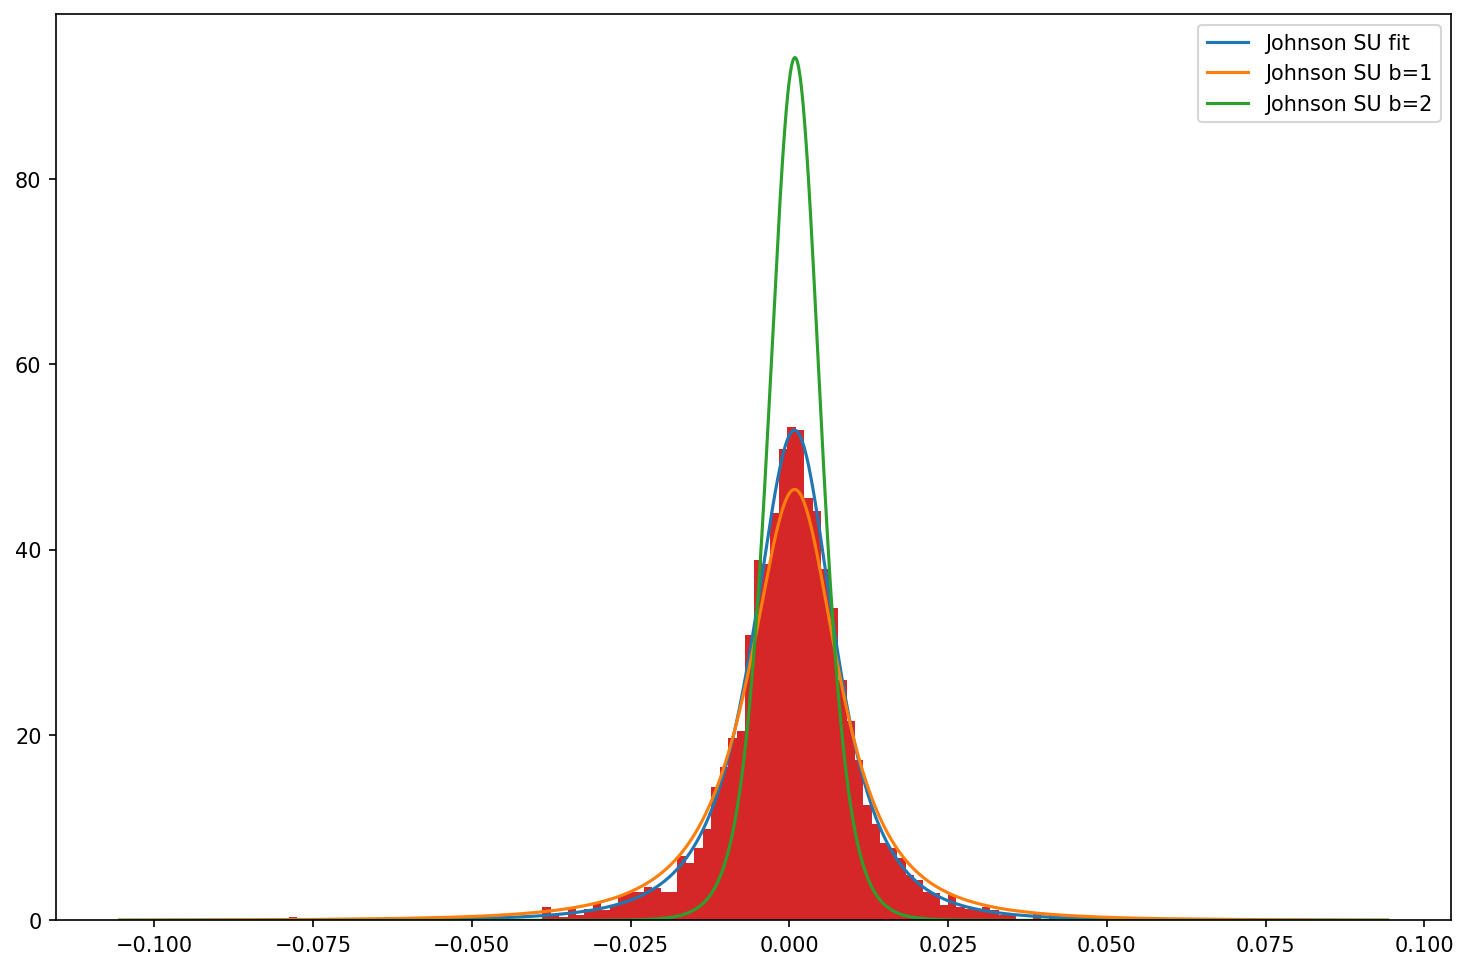

In [34]:
# reset parameters
dist = getattr(stats, 'johnsonsu')
param = list(dist.fit(isf_daily))

# Johnson SU
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label='Johnson SU fit')

# parameter a lower
param[1] = 1
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU b={param[1]}')

# parameter a higher
param[1] = 2
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU b={param[1]}')


# Sample histogram
plt.hist(isf_daily, bins=150, density=True)

plt.legend();

### Parameter loc

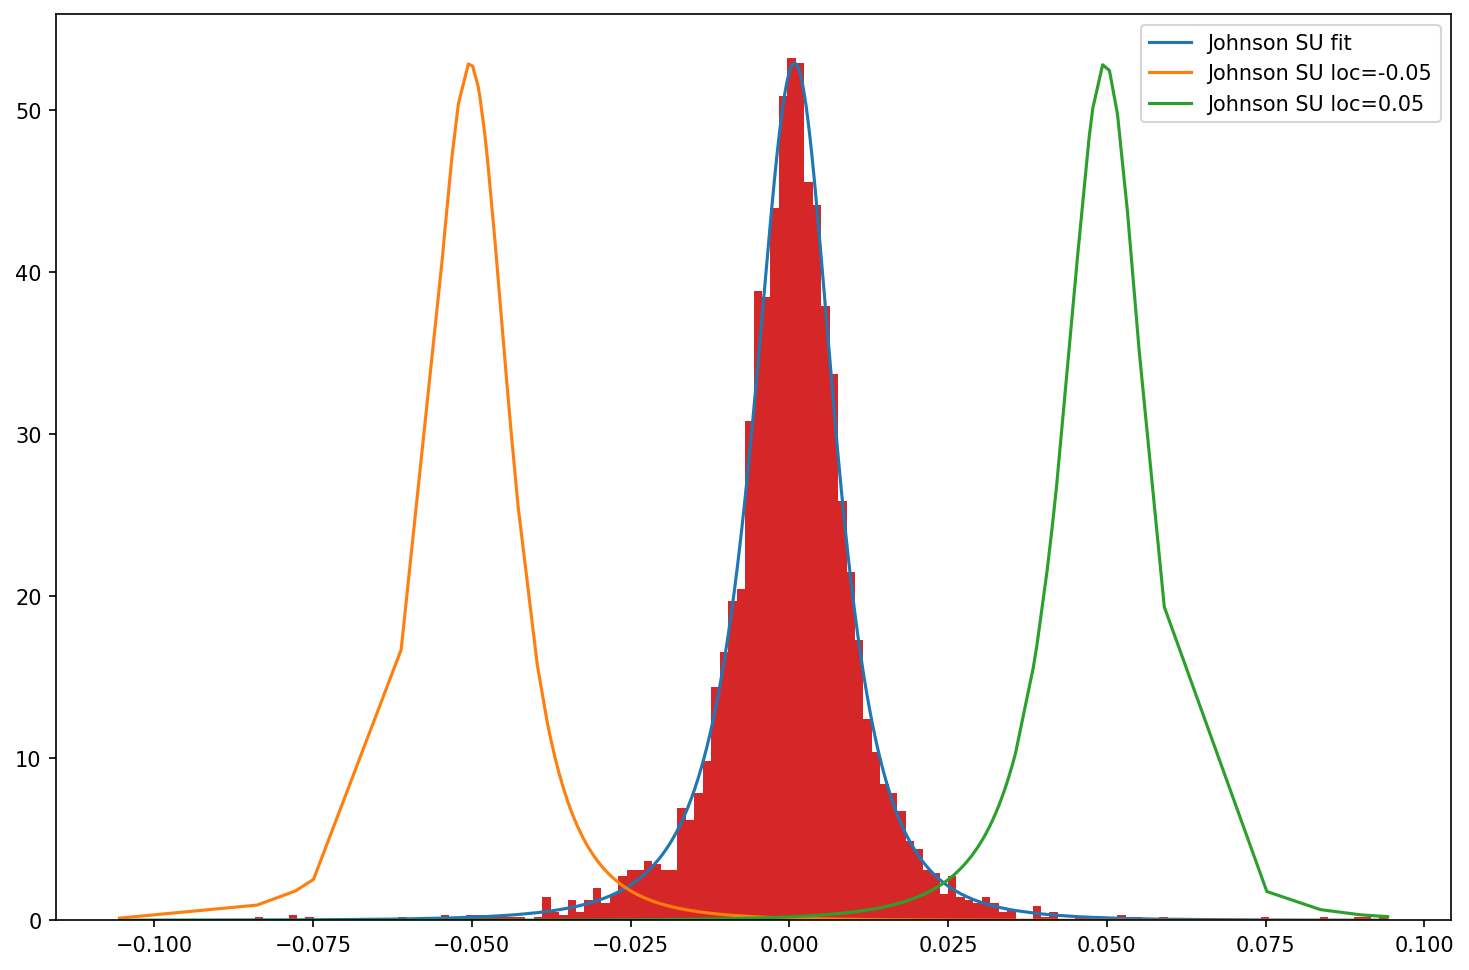

In [35]:
# reset parameters
dist = getattr(stats, 'johnsonsu')
param = list(dist.fit(isf_daily))

# Johnson SU
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label='Johnson SU fit')

# parameter a lower
param[2] = -0.05
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU loc={param[2]}')

# parameter a higher
param[2] = 0.05
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU loc={param[2]}')


# Sample histogram
plt.hist(isf_daily, bins=150, density=True)

plt.legend();

### Parameter scale

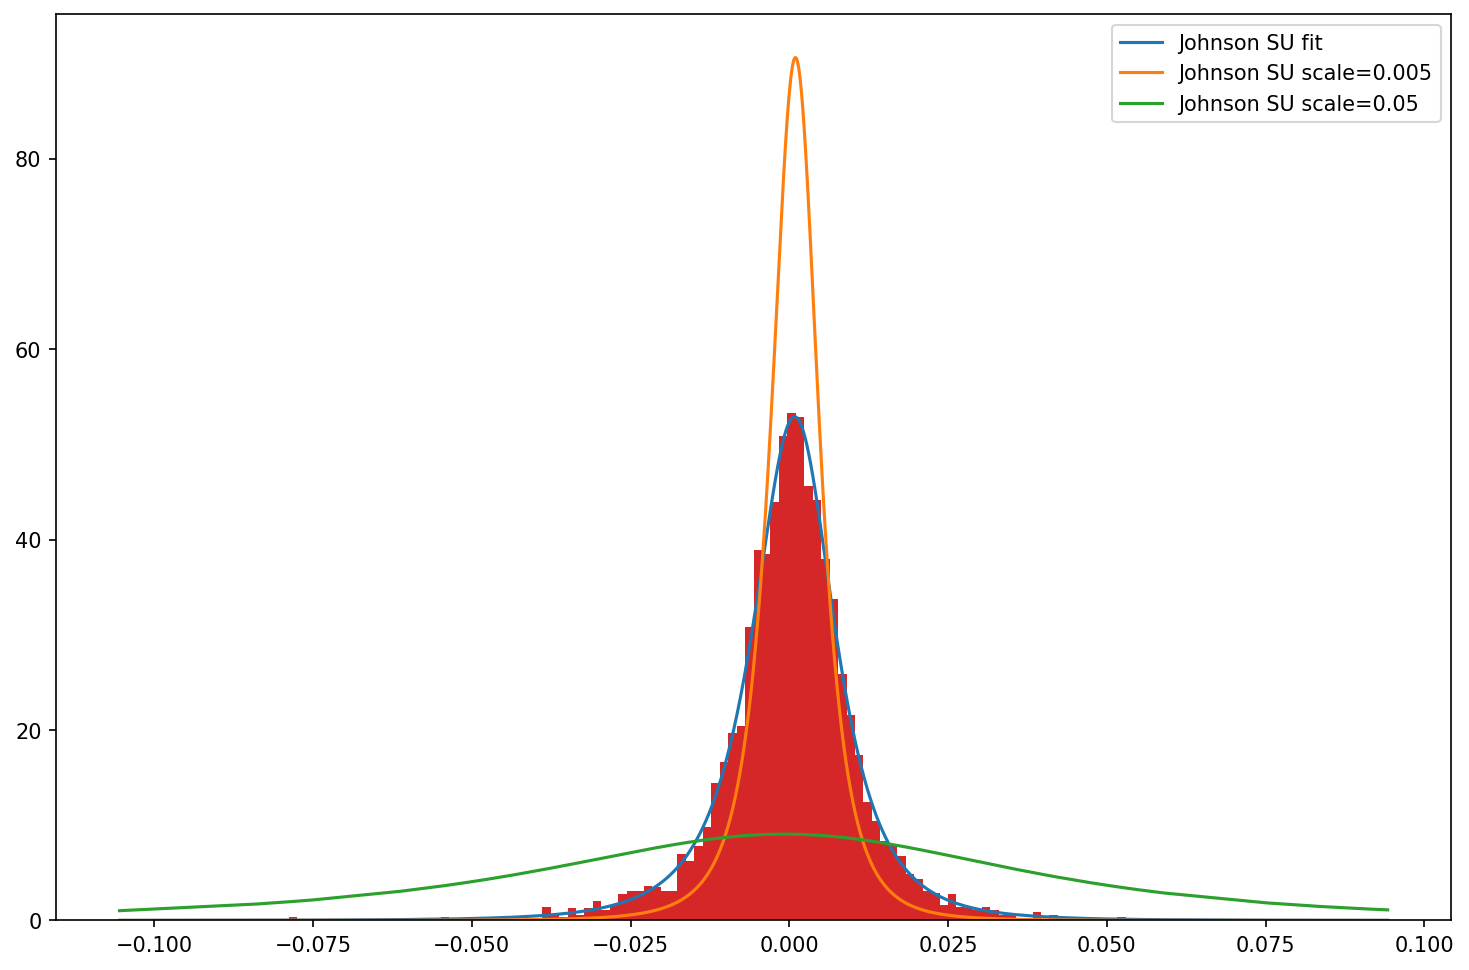

In [36]:
# reset parameters
dist = getattr(stats, 'johnsonsu')
param = list(dist.fit(isf_daily))

# Johnson SU
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label='Johnson SU fit')

# parameter a lower
param[3] = 0.005
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU scale={param[3]}')

# parameter a higher
param[3] = 0.05
pdf = dist.pdf(isf_daily, *param)
plt.plot(isf_daily, pdf, label=f'Johnson SU scale={param[3]}')


# Sample histogram
plt.hist(isf_daily, bins=150, density=True)

plt.legend();

# Further Exploration

In [37]:
isf = (
    isf.eval('factor = 1 + (`4. close` - `5. adjusted close`) / `5. adjusted close`')
    .eval('adjusted_open = `1. open` / factor')
    .eval('adjusted_high = `2. high` / factor')
    .eval('adjusted_low  = `3. low` / factor')
)

In [373]:
# set distribution on daily change
dist = getattr(stats, 'johnsonsu')
param = dist.fit(isf_daily)

In [283]:
# calculate mean of distribution (population)
dist.stats(*param, moments='mv')

(array(0.00028188), array(0.00013637))

## Probability of activating stop loss

In [284]:
isf['ATR'] = Finance.ATR(isf.adjusted_high, isf.adjusted_low, isf['5. adjusted close'], n=14)

In [285]:
# assume we bought at the close...
latest_close, latest_low, latest_atr = isf.iloc[-1][['5. adjusted close', 'adjusted_low', 'ATR']]
latest_stop_loss_pct = - (latest_atr + (latest_close - latest_low)) / latest_close
latest_stop_loss_pct

-0.016177553109268224

In [286]:
# this is not entirely accurate. This would need to take into account the lows of the day.
print(f"Probability stop loss activated after one day x1: {100*dist.cdf(latest_stop_loss_pct, *param):.2f}%")
print(f"Probability stop loss activated after one day x2: {100*dist.cdf(2*latest_stop_loss_pct, *param):.2f}%")
print(f"Probability stop loss activated after one day x3: {100*dist.cdf(3*latest_stop_loss_pct, *param):.2f}%")
print(f"Probability < 0% change: {100*dist.cdf(0, *param):.2f}%")

Probability stop loss activated after one day x1: 5.76%
Probability stop loss activated after one day x2: 1.13%
Probability stop loss activated after one day x3: 0.33%
Probability < 0% change: 47.05%


In [287]:
# set distribution on real weekly change
dist = getattr(stats, 'johnsonsu')
param = dist.fit(isf_trueweekly)

In [288]:
# this is not entirely accurate. This would need to take into account the lows of the day.
print(f"Probability stop loss activated after one week x1: {100*dist.cdf(latest_stop_loss_pct, *param):.2f}%")
print(f"Probability stop loss activated after one week x2: {100*dist.cdf(2*latest_stop_loss_pct, *param):.2f}%")
print(f"Probability stop loss activated after one week x3: {100*dist.cdf(3*latest_stop_loss_pct, *param):.2f}%")

Probability stop loss activated after one week x1: 19.27%
Probability stop loss activated after one week x2: 8.17%
Probability stop loss activated after one week x3: 3.66%


In [76]:
def yield_dist_rvs():
    while True:
        yield 1 + dist.rvs(*param)
rvs = yield_dist_rvs()

In [304]:
# monte carlo to estimate stop loss hit

iterations = 10000
days = 20
x = 1
stop_loss = 1 + x * latest_stop_loss_pct

hits = np.sum(
    [
        np.any(np.multiply.accumulate([next(rvs) for _ in range(days)]) <= stop_loss) 
        for _ in range(iterations)
    ]
)


In [305]:
100 * hits / iterations

69.49

In [306]:
stop_loss

0.9838224468907317

In [374]:
# monte carlo to estimate future gains provided stop loss isn't triggered

iterations = 100000
days = 20

outcomes1 = [
        np.multiply.accumulate([next(rvs) for _ in range(days)])
        for _ in range(iterations)
    ]

outcomes2 = [row[-1] for row in outcomes1 if not np.any(row <= stop_loss)]


In [375]:
print(
 f"min={min(outcomes2)},\
 max={max(outcomes2)},\
 mean={np.mean(outcomes2)},\
 median={np.median(outcomes2)},\
 count={len(outcomes2)}/{iterations}"
)

min=0.983859311575649, max=1.3107283439883095, mean=1.0446745986082542, median=1.0391744329932038, count=41711/100000


In [422]:
%%capture --no-stdout

multiple_dist_goodness_of_fit(outcomes2)

alpha
anglit
arcsine
argus
beta
betaprime
bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang
expon
exponnorm
exponweib
exponpow
f
fatiguelife
fisk
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper
gamma
gengamma
genhalflogistic
geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
kappa4
kappa3
ksone
kstwobign
laplace
laplace_asymmetric
levy
levy_l
logistic
loggamma
loglaplace
lognorm
loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2
ncf
nct
norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm
powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda
uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy
weibull_min: statistic=0.00937751208770643, pvalue=0.0012951218573942877
gausshyper: statistic=0.010086869431454981, pvalue=0.0004091248230192252
chi: 

In [423]:
# review the "best" distribution
dist = getattr(stats, 'kstwobign')
param = dist.fit(outcomes2)

In [400]:
# calculate mean of distribution (population)
dist.stats(*param, moments='m')

array(1.04470471)

In [401]:
# calculate mean of sample data
np.mean(outcomes2)

1.0446745986082542

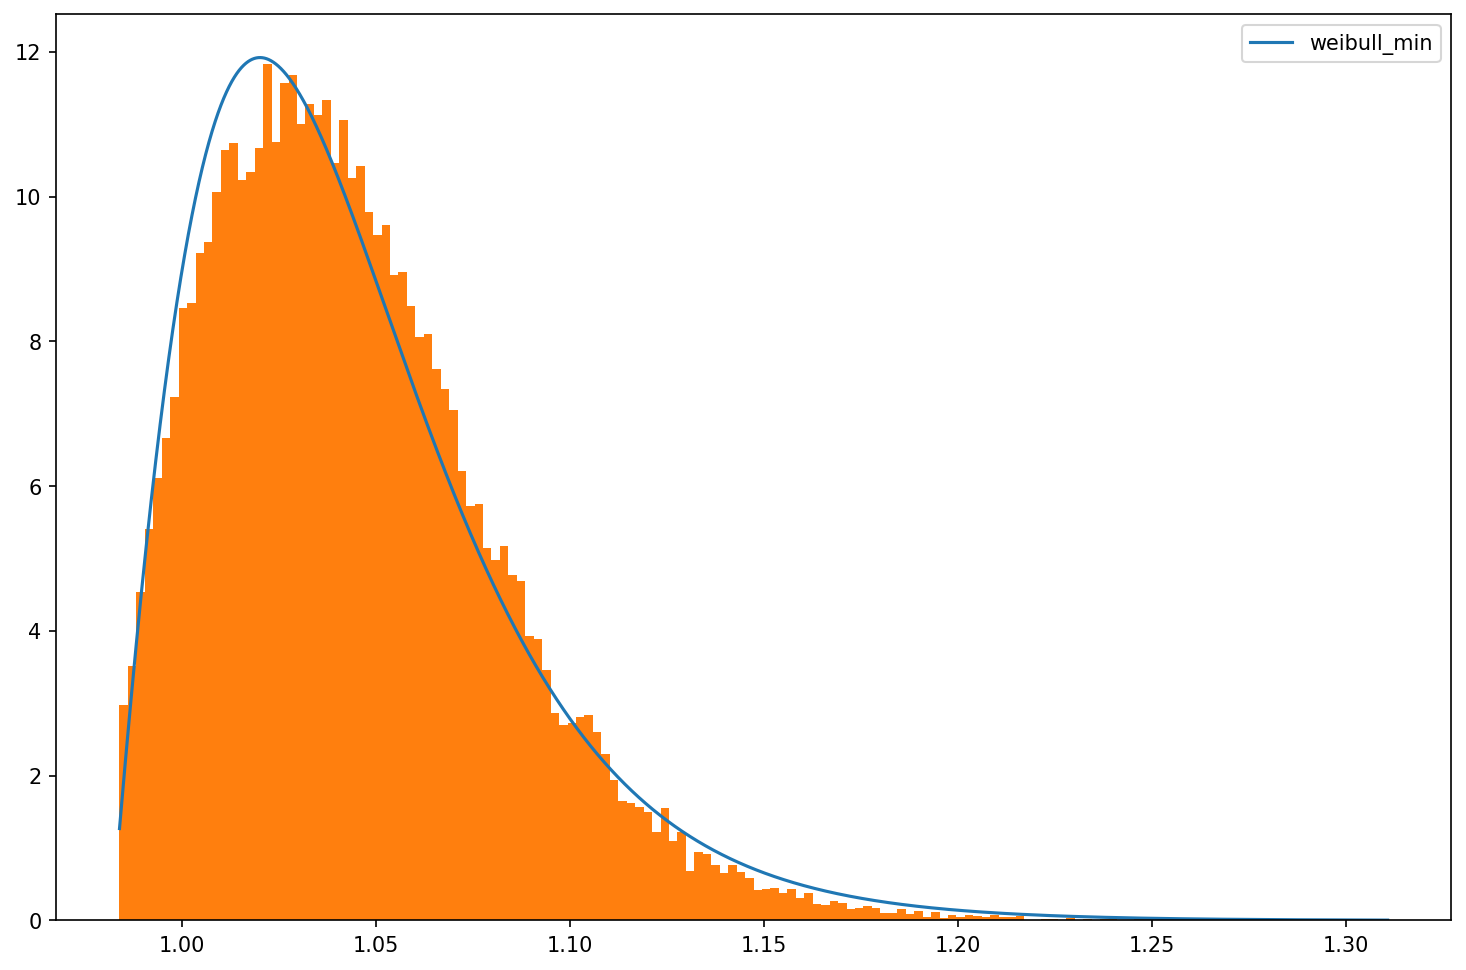

In [402]:
# plot sample, best distribution

# kstwobign
pdf = dist.pdf(sorted(outcomes2), *param)
plt.plot(sorted(outcomes2), pdf, label='kstwobign')

# Sample histogram
plt.hist(outcomes2, bins=150, density=True)

plt.legend();

In [403]:
print(f"Probability less than stop loss: {100*dist.cdf(1.6, *param):.2f}%")

Probability less than stop loss: 100.00%


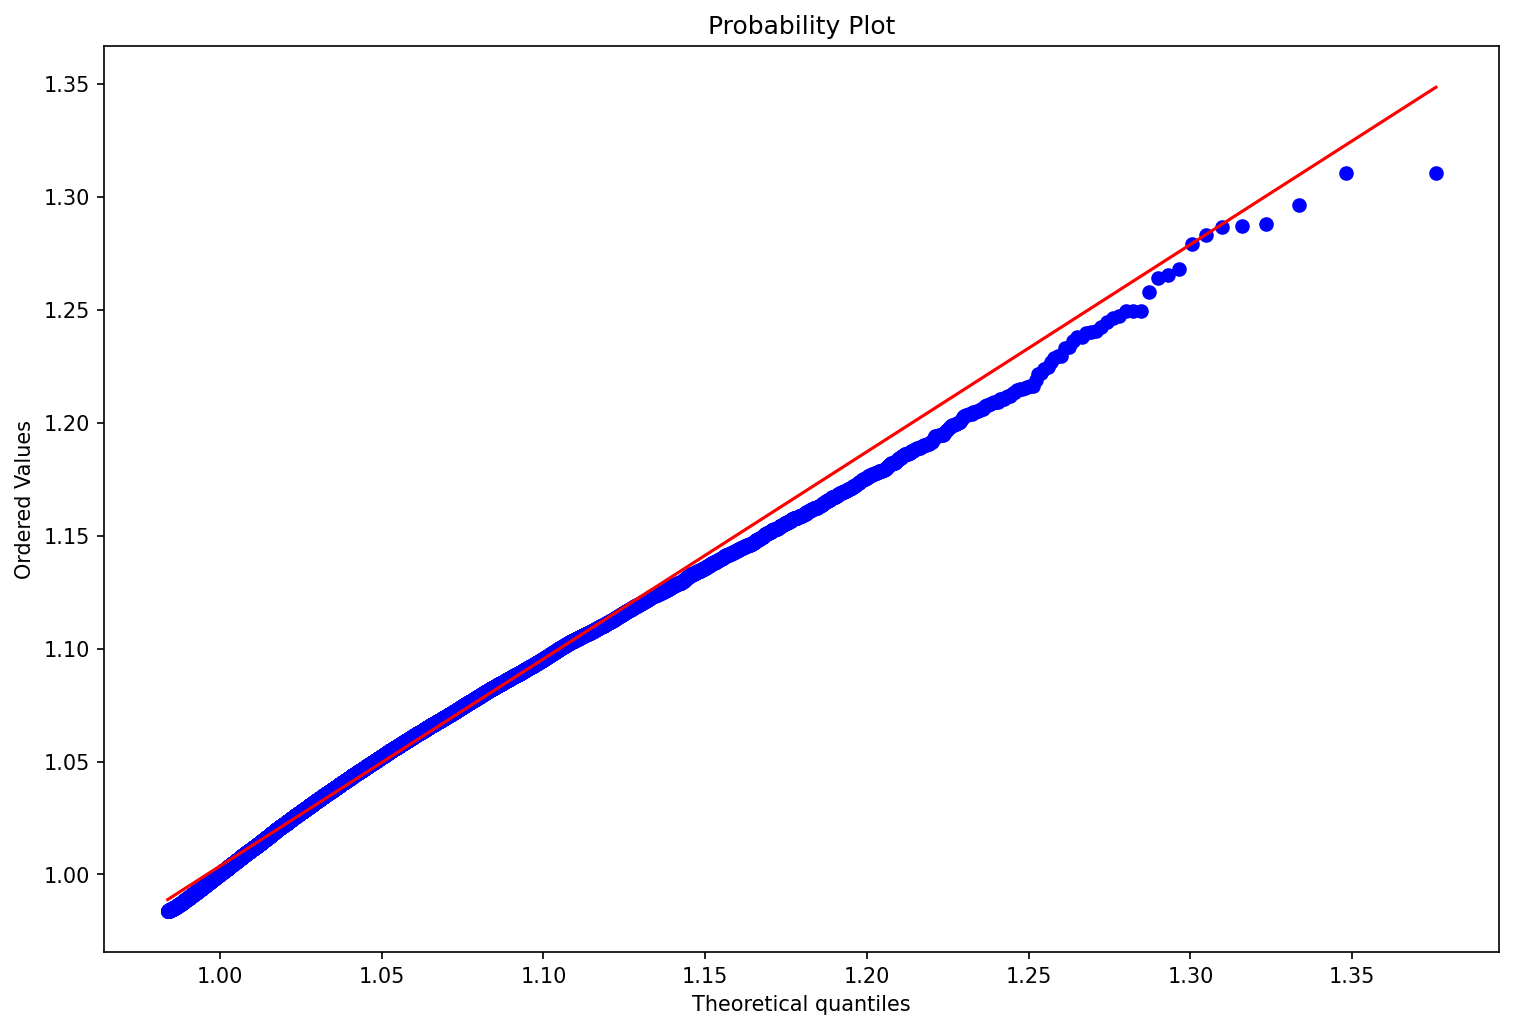

In [404]:
# probability plot against distribution
stats.probplot(outcomes2, plot=plt, dist=dist(*param));

#### Process for setting stop loss:
1. At end of the day, run ATR over the time series (14 periods)
2. stop loss = day low - ATR
3. Once trade complete use this stop loss regardless of how the price has changed since purchase?? Is this right?

In [90]:
# next steps:
    # get PE ratios for ISF
    # 5 year moving average as a function of PE ratio?  
    